In [21]:
''' Computer side'''

import zmq
import io
from PIL import Image
import numpy as np

try: 
    context = zmq.Context()
    print('Connecting to server...')
    socket = context.socket(zmq.REQ)
    socket.connect("tcp://10.164.7.213:5555")
    print('Server connected')
 
    pic = open("pic_picam.png", "r+b")
    
    for request in range(5):
        print("Sending request n.%s..." % request)
        socket.send(b'Client camera request')

        image_stream = io.BytesIO()
        message = socket.recv()
        print("Received reply n.%s [ %s ]" % (request, len(message)))
        
        image_stream.write(message)
        image_stream.seek(0)

        image = Image.open(image_stream)        
        array = np.array(image.getdata()).reshape(image.size[1], image.size[0], 3)
        print(array.shape)

finally:         
    print('\nNo more requests, sending kill signal')
    socket.send(b'END')
    
    socket.close()
    context.term()
    print('\nSocket and context closed')

Connecting to server...
Server connected
Sending request n.0...
Received reply n.0 [ 179611 ]
(480, 640, 3)
Sending request n.1...
Received reply n.1 [ 176958 ]
(480, 640, 3)
Sending request n.2...
Received reply n.2 [ 178488 ]
(480, 640, 3)
Sending request n.3...
Received reply n.3 [ 177206 ]
(480, 640, 3)
Sending request n.4...
Received reply n.4 [ 176518 ]
(480, 640, 3)

No more requests, sending kill signal

Socket and context closed


# Grabbing the picture and creating a unprocessed and/or processed file from it
---

[[[13  9  0]
  [13  9  0]
  [13  9  0]
  ..., 
  [27 31 17]
  [30 32 18]
  [30 32 18]]

 [[12  8  0]
  [14 10  0]
  [12  8  0]
  ..., 
  [29 33 19]
  [30 32 18]
  [29 31 17]]

 [[12  9  0]
  [11  8  0]
  [11  8  0]
  ..., 
  [28 32 18]
  [27 31 17]
  [26 30 16]]

 ..., 
 [[29 23  9]
  [29 23  9]
  [29 23  9]
  ..., 
  [48 47 27]
  [49 48 27]
  [50 50 26]]

 [[25 21  9]
  [27 23 11]
  [30 24 12]
  ..., 
  [45 47 26]
  [47 49 27]
  [47 49 27]]

 [[27 25 12]
  [26 24 11]
  [30 24 12]
  ..., 
  [45 47 26]
  [47 49 27]
  [45 47 25]]]
[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [255   0   0]
  [255   0   0]
  [255   0   0]]

 ..., 
 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ..., 
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255   0   0]
  [255   0   0]
  

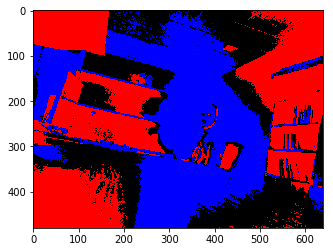

In [23]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Unprocessed file ###
#img = plt.imshow(255-array*1.)
#plt.savefig('unproc_fig.png', dpi=1000) #dpi=1000 output a high-quality file but greatly increase processing time

### Processed file ###
h, w = 480, 640
sparseness = 0.35
rgb2gray = [0.2989, 0.5870, 0.1140]

n_datapoints = int(np.ceil(sparseness*h*w)) #Calculating the maximum number of data points according to these paramaters

frame = array.astype(np.float)          #Convert the data to float (modifications will be easier)
frame *= np.array(rgb2gray)[np.newaxis, np.newaxis, :]
frame = frame.sum(axis=-1)              #Sum the data along an axis (negative : count from the last to the first axis)

data_ = np.argsort(frame.ravel()) #Put the data into one dimension and sort it; return the indices (initial position #)
data = np.hstack((data_[:n_datapoints], data_[-n_datapoints:]))

frame = np.zeros((h, w, 3), dtype = np.uint8)
frame[:, :, 0][np.unravel_index(data[:n_datapoints], (h, w))] = 255
frame[:, :, -1][np.unravel_index(data[-n_datapoints:], (h, w))] = 255

img = plt.imshow(frame)
plt.savefig('proc_fig.png', dpi=1000) #dpi=1000 output a high-quality file but greatly increase processing time

In [5]:
print(array.min(), array.max())

250